In [1]:
import numpy as np
import matplotlib.pyplot as plt

This is an example file in the Kaggle format. Data is stored as a simple CSV with 6 columns:

0. Object ID (not included here): This labels the event with a unique int
1. Time: Time in days. Specifically uses 'Modified Julian Days', where day 0 is in the 1800s
2. Passband: The filter color of the observations. These are listed as an integer, where 0 is the bluest filter (think ultraviolet) and 5 is the reddest color (infrared).
3. Flux: A measurement of how much light we are receiving from an event at a given time
4. Flux error
5. Detected: A boolean to say whether or not a source is detected. Note that somertimes there may be positive flux, but the event is 'Not Detected'. This is because we see stray light all over the night sky, so it is not associated with the astronomical event. (Statistically, this flag is just checking if the flux is well outside the Poisson distribution that descrbes the background)

In [6]:
obj_id, time, passband, flux, flux_err, detected = np.loadtxt('test_set_sample.csv',delimiter=',',skiprows=1, unpack=True)

Text(0.5, 1.0, 'An example light curve from Kaggle')

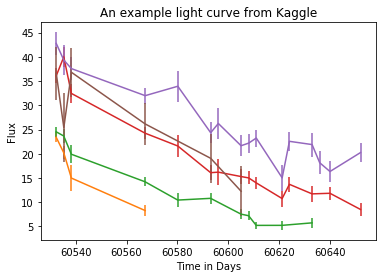

In [14]:
for possible_passband in np.arange(6):
    good_ind = np.where((passband==possible_passband) & (detected == 1))
    plt.errorbar(time[good_ind],flux[good_ind],yerr=flux_err[good_ind])
plt.xlabel('Time in Days')
plt.ylabel('Flux')
plt.title('An example light curve from Kaggle')

There is actually a lot of astronomy pre-processing we can do, which I will just do for you to start (unless you, for any reason, want to do this step). I am now uploading a pre-processed data which has four keys:

1. 'times'
2. 'fluxes'
3. 'flux_errs'
4. 'filters' (described above as passbands)

Each row of this dataset is an event with heavy pre-processing, bulleted below:
1. We correct each light curve for its distance
2. We correct for 'time dilation', which is the effect that events futher away appear to evolve more slowly
3. We correct for dust in the Milky Way, which eats up blue photons in a predictable way
4. We take the logarithm (base 10) and then the negative of everything, because that is the unit astronomer's use (called "magnitudes"). Fun fact: we do this because our eyes are actually sensitive to light on a log scale so it comes from historical astronomers

In [22]:
preprocessed_data = np.load('mockdata.npz',allow_pickle=True)
print(preprocessed_data.files)

['times', 'fluxes', 'flux_errs', 'filters']


['3' '1' '0' '1' '0' '3' '2' '3' '4' '1' '3' '4' '5' '5' '4' '3' '2' '3'
 '4' '4' '3' '2' '2']


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


Text(0.5, 1.0, 'An example light curve from Kaggle')

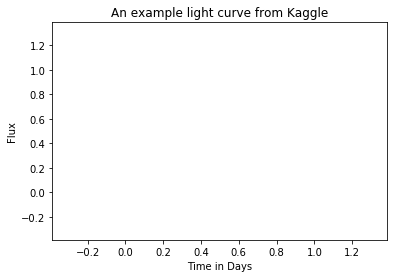

In [32]:
obj_id = 52
time = preprocessed_data['times'][obj_id]
flux = preprocessed_data['fluxes'][obj_id]
flux_err = preprocessed_data['flux_errs'][obj_id]
passband = np.asarray(preprocessed_data['filters'][obj_id],dtyp
for possible_passband in np.arange(6):
    good_ind = np.where((passband==possible_passband))
    plt.errorbar(time[good_ind],flux[good_ind],yerr=flux_err[good_ind])
plt.xlabel('Time in Days')
plt.ylabel('Flux')
plt.title('An example light curve from Kaggle')